In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 5


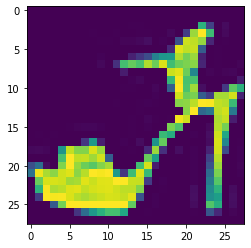

In [19]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :", ytrain[imgIndex])
plt.imshow(image)


In [20]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7211 - accuracy: 0.7660 - val_loss: 0.5184 - val_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4869 - accuracy: 0.8299 - val_loss: 0.4687 - val_accuracy: 0.8392
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4435 - accuracy: 0.8439 - val_loss: 0.4107 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4176 - accuracy: 0.8540 - val_loss: 0.3946 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3982 - accuracy: 0.8604 - val_loss: 0.3831 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3817 - accuracy: 0.8661 - val_loss: 0.3657 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3680 - accuracy: 0.8693 - val_loss: 0.3842 - val_accur

In [24]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 96ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.9213925e-21 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [25]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 0]
